In [1]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [2]:
import plotly.io as pio
pio.renderers.default='colab'

In [25]:
#Csv file with historical data extracted from finance.yahoo.com/
df= pd.read_csv("BTC-USD.csv")

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2.798000e+03
mean,12185.395466,12505.015463,11830.988204,12194.240974,12194.240974,1.515965e+10
std,16626.492627,17058.465036,16128.668287,16624.570016,16624.570016,1.996155e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,615.181763,622.262237,610.708511,616.844254,616.844254,8.354850e+07
50%,6470.429931,6569.500000,6367.479981,6476.015137,6476.015137,5.478888e+09
75%,11120.103028,11449.158692,10849.287353,11156.725342,11156.725342,2.579628e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
px.area(df, x="Date", y="Low")

In [7]:
px.area(df, x="Date", y="Volume")

Data Preperation

In [8]:
columns=('Date',"Low")
ndf= pd.DataFrame(df, columns=columns)

In [9]:
ndf

,Date,Low
0,2014-09-17,452.421997
1,2014-09-18,413.104004
2,2014-09-19,384.532013
3,2014-09-20,389.882996
4,2014-09-21,393.181000
...,...,...
2793,2022-05-11,28170.414063
2794,2022-05-12,26350.490234
2795,2022-05-13,28782.330078
2796,2022-05-14,28702.910156


In [10]:
prophet_df= ndf.rename(columns={'Date':'ds', 'Low':'y'})

Creating Facebook Prophet Model

In [11]:
m=Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future= m.make_future_dataframe(periods=1095)
forecast=m.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,-200.014367,-8718.916639,6273.824716,-200.014367,-200.014367,-1001.892277,-1001.892277,-1001.892277,1.175440,1.175440,1.175440,-1003.067717,-1003.067717,-1003.067717,0.0,0.0,0.0,-1201.906644
1,2014-09-18,-198.613304,-8779.075621,6406.978328,-198.613304,-198.613304,-1067.293557,-1067.293557,-1067.293557,-10.413101,-10.413101,-10.413101,-1056.880456,-1056.880456,-1056.880456,0.0,0.0,0.0,-1265.906861
2,2014-09-19,-197.212241,-9416.253704,5672.268519,-197.212241,-197.212241,-1172.896548,-1172.896548,-1172.896548,-66.664082,-66.664082,-66.664082,-1106.232466,-1106.232466,-1106.232466,0.0,0.0,0.0,-1370.108789
3,2014-09-20,-195.811178,-8778.414300,6296.753721,-195.811178,-195.811178,-1081.651491,-1081.651491,-1081.651491,68.796590,68.796590,68.796590,-1150.448081,-1150.448081,-1150.448081,0.0,0.0,0.0,-1277.462669
4,2014-09-21,-194.410115,-8852.926275,6565.933088,-194.410115,-194.410115,-1176.378083,-1176.378083,-1176.378083,12.481292,12.481292,12.481292,-1188.859375,-1188.859375,-1188.859375,0.0,0.0,0.0,-1370.788198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,2025-05-10,105025.967096,81012.393312,130707.870060,82221.335772,129244.126927,-58.287687,-58.287687,-58.287687,68.796590,68.796590,68.796590,-127.084277,-127.084277,-127.084277,0.0,0.0,0.0,104967.679409
3889,2025-05-11,105074.001628,80102.046006,130367.607844,82228.310657,129342.168646,-134.120833,-134.120833,-134.120833,12.481292,12.481292,12.481292,-146.602125,-146.602125,-146.602125,0.0,0.0,0.0,104939.880795
3890,2025-05-12,105122.036160,81323.184820,130288.831015,82235.285541,129440.210366,-188.112087,-188.112087,-188.112087,-22.901130,-22.901130,-22.901130,-165.210957,-165.210957,-165.210957,0.0,0.0,0.0,104933.924073
3891,2025-05-13,105170.070693,80167.879714,129811.076578,82242.260425,129538.252085,-165.434289,-165.434289,-165.434289,17.524990,17.524990,17.524990,-182.959280,-182.959280,-182.959280,0.0,0.0,0.0,105004.636403


In [21]:
px.line(forecast, x='ds', y='yhat')

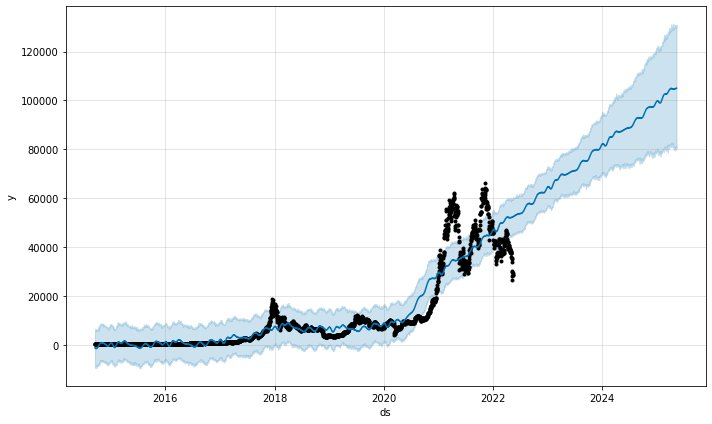

In [22]:
#Average value forecast
figure= m.plot(forecast, xlabel='ds', ylabel='y')

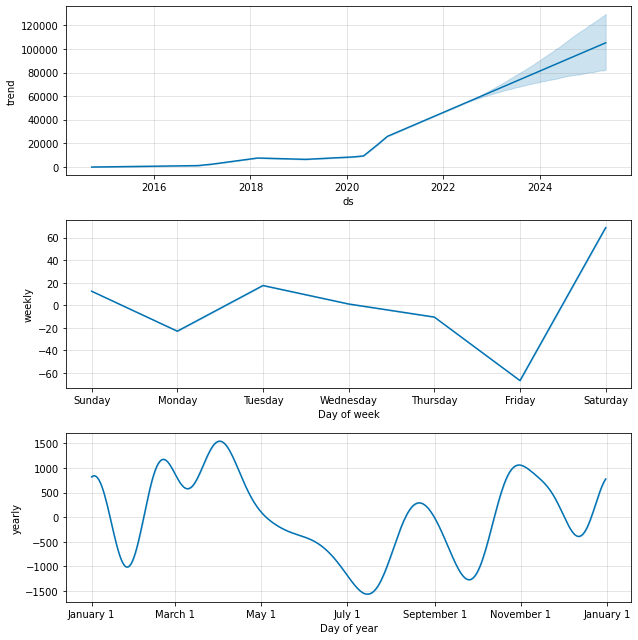

In [24]:
#Trends since 2014
figure2=m.plot_components(forecast)